# Let's Build a Neural Network for Tabular Data using PyTorch

## Table of Contents

- <a href="#importing-libraries">1. Importing Libraries</a>
- <a href="#loading-dataset">2. Loading the Dataset and Checking its Shape</a>
- <a href="#missing-values">3. Checking for Missing Values</a>
- <a href="#duplicate-records">4. Handling Duplicate Records</a>
- <a href="#encoding-categorical">5. Encoding Categorical Variables</a>
- <a href="#splitting-data">6. Splitting Features and Target Variable</a>
- <a href="#pytorch-tensors">7. Converting Data to PyTorch Tensors and Creating Data Loaders</a>
- <a href="#neural-network">8. Defining the Neural Network Architecture</a>
- <a href="#training-network">9. Training the Neural Network</a>
- <a href="#visualizing-loss">10. Visualizing Loss Curves</a>
- <a href="#making-predictions">11. Making Predictions and Evaluating Performance</a>
- <a href="#comparing-values">12. Comparing Actual vs. Predicted Values</a>
- <a href="#saving-model">13. Saving Model Parameters</a>
- <a href="#loading-model">14. Loading the Model</a>

## 0. Introduction

### What is PyTorch?

[PyTorch](https://pytorch.org/) is an open-source deep learning framework developed by Facebook's AI Research lab (FAIR). It is widely known for its dynamic computational graph and efficient tensor operations, making it a popular choice for both researchers and productions environments.

### Key Features of PyTorch:
- **Dynamic Computational Graph (Define-by-Run):** Unlike static frameworks, PyTorch allows you to define and modify the computational graph on the fly. This flexibility is beneficial for debugging and developing complex deep neural networks.
- **Tensors and Autograd:** PyTorch provides a multidimensional array, called a Tensor, which can run on both CPUs and GPUs. The `autograd` module automates the computation of gradients, simplifying the backpropagation process for neural networks.
- **NN Module:** PyTorch's `torch.nn` module makes it easy to build and train neural networks by making it convenient to abstract layers, loss functions, and optimizers.
- **Optimized Performance:** Using PyTorch, users can take advantage of faster training time. This is possible due to hardware acceleration with GPU support.

All in all, PyTorch strikes a balance between flexibility and ease of use, making it a preferred choice for many in the deep learning community.

### About the Problem

In this tutorial, we will build a neural network for a regression task using PyTorch. The dataset we'll be using is the [Student Performance (Multiple Linear Regression)](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression) dataset by [Nikhil Narayan](https://www.kaggle.com/nikhil7280).

### Objective

The goal of this task is to predict the final grade of students based on the given features. Our aim is to minimize the prediction error.

### Dataset Overview

The dataset has the following features (as can be viewed in the dataset's data card):

- **Hours Studied:** The total number of hours spent studying by each student.
- **Previous Scores:** The scores obtained by students in previous tests.
- **Extracurricular Activities:** Whether the student participates in extracurricular activities (Yes or No).
- **Sleep Hours:** The average number of hours of sleep the student had per day.
- **Sample Question Papers Practiced:** The number of sample question papers the student practiced.

The target variable is described as follows:
- **Performance Index:** A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

It is always good to know your data well before starting model building and trying out your ideas. In order to keep this notebook focused only on the model building part, I will only do the bare minimum data preprocessing, and no exploratory data analysis.

## 1. Importing Libraries

In this cell, we import the necessary libraries to build, train, and evaluate our neural network model:
    
- **PyTorch:** We import `torch` and `torch.nn` modules to build our neural network and handle tensor operations. We also bring in `TensorDataset` and `DataLoader` from `torch.utils.data` to manage our dataset and create data loaders. 
- **Pandas and NumPy:** We import these libraries for dataset manipulation and numerical operations. `pandas` will be used to load the dataset which is in the form of a `csv` file in our case.
- **Scikit-learn:** We import `train_test_split` to split our data into training and testing sets. We also bring in `mean_squared_error` to evaluate the performance of our regression model. `StandardScaler` class has been imported to scale the numerical features.

In [29]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

## 2. Loading the Dataset and Checking its Shape

We load the dataset using `pandas.read_csv` function. Next, we check the shape of the dataset.

In [30]:
df = pd.read_csv('Student_Performance.csv')
df.shape

(10000, 6)

## 3. Checking for Missing Values

To ensure the dataset is clean and ready for modeling, we check for missing values in each column using `df.isnull().sum()`. This function returns the total number of missing values per column. Identifying missing data early is crucial, as it may require us to apply imputation or remove rows/columns with too many missing values. This step helps us understand the quality of the dataset and prepare it for further analysis.

In [31]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

There are no missing values in any of the columns of the dataset.

## 4. Handling Duplicate Records <font color="red">(Come change this later to see what happens)</font>

We start by checking for duplicate rows in the dataset using `df.duplicated().sum()`, which returns the number of duplicate rows. Identifying duplicates is important because they can skew the analysis and model performance .

- `df[df.duplicated()]` displays the actual duplicate rows, providing a glimpse into which rows are duplicated.
- We then remove the duplicate rows using `df.drop_duplicates(keep='last')`, keeping the last occurrence of each duplicate entry. This ensures that the dataset is unique and free from redundant records, which helps maintain the integrity of our analysis and model training.

In [32]:
df.duplicated().sum()

np.int64(127)

In [33]:
df[df.duplicated()]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71.0
9940,8,95,No,5,2,90.0
9954,6,97,No,8,7,92.0
9966,1,41,No,7,3,12.0


In [34]:
df = df.drop_duplicates(keep='last')

In [35]:
df.duplicated().sum()

np.int64(0)

So, the duplicate rows have been successfully handled.

## 5. Encoding Categorical Variables

In this step, we apply **label encoding** to the **`Extracurricular Activities`** feature. We use the `map` function to convert:
- **'Yes'** to **1**
- **'No'** to **0**

Label encoding is a technique used to convert categorical variables into numerical values. This transformation is crucial for machine learning models, as they require numerical input to perform calculations and learn patterns.

**Label Encoding** is suitable when the categorical variable has only two categories. For features with multiple categories, **one-hot encoding** is an alternative approach. One-hot encoding creates a new binary column for each category, ensuring that no ordinal relationships are implied between categories. This method can be used when a categorical feature has more than two possible values, helping the model to better interpret each distinct category without assuming any inherent order.

In [36]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

## 6. Splitting Features and Target Variable

In this step, we separate the dataset into features (`X`) and the target variable (`y`):

1. **Features (`X`):** We create `X` by dropping the target variable, that is, **`Performance Index`**.
2. **Target Variable(`y`):** We assign `y` to be the target variable, that is, **`Performance Index`** in this case.

Next, we split the data into training and test sets using `train_test_split` from `scikit-learn`. This step is crucial as it allows us to evaluate how well our model generalizes to unseen data.

In [37]:
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
8622,7,70,1,4,1
9139,9,59,1,9,8
4165,7,41,1,7,4
825,9,71,1,9,5
6900,9,75,1,4,1
...,...,...,...,...,...
5835,1,42,1,9,9
5280,8,78,0,8,1
5485,7,79,1,9,5
874,8,95,1,6,3


In [39]:
X_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6165,4,94,0,5,9
106,7,90,1,4,1
9281,8,97,0,4,9
4760,5,83,1,4,4
2191,7,55,1,7,1
...,...,...,...,...,...
8761,9,69,0,5,7
3154,9,98,1,6,9
5359,3,85,1,5,2
6182,3,48,1,6,6


## 7. Converting Data to PyTorch Tensors and Creating Data Loaders

In this step, we prepare the data into a form which can be fed to a neural network in PyTorch.

1. **Converting to Tensors:**
    - We convert the training and test feature matrices, as well as the training and test target variables into PyTorch Tensors. While doing so, we specify the data type as `torch.float32`, ensuring that the values are in a format compatible with our neural network.

2. **Creating TensorDatasets:**
    - We combine the feature and target variables for the training and testing sets into `TensorDataset` objects. This enables us to conveniently pass both the inputs and corresponding labels to the model during the training and evaluation.
    
3. **Creating Data Loaders:**
     - The main reason for creating data loaders is that they can handle batching and shuffling of data, which improves training efficiency and ensures that the model does not learn in a fixed order.
     - Note that I have set `shuffle` has `True` for the training data loader and `False` for the testing data loader, as I didn't want any inherent order to creep into the model while training. On the other hand, since the testing data loader is only for the calculation of test losses, shuffling isn't really necessary.

In [40]:
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [41]:
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_dataloader = DataLoader(train_data, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=128, shuffle=False)

## 8. Defining the Neural Network Architecture

In this step, we are going to define a neural network model using PyTorch by creating a `NeuralNetwork` class that inherits from `torch.nn,Module`. This class is responsible for constructing the layers of the network and implementing the forward pass.

This architecture is meant for regression, and that is why the final layer has `out_features` hard-coded as `1`.

In [42]:
class NeuralNetwork(nn.Module):
    
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(in_features=input_dim, out_features=hidden_dim * 2),
            nn.ReLU(),
            nn.Linear(in_features=hidden_dim * 2, out_features=hidden_dim * 4),
            nn.ReLU(),
            nn.Linear(in_features=hidden_dim * 4, out_features=hidden_dim * 8),
            nn.ReLU(),
            nn.Linear(in_features=hidden_dim * 8, out_features=1)
        )
        
    def forward(self, x):
        return self.network(x)

In [43]:
# Instantiate the NeuralNetwork class
model = NeuralNetwork(input_dim=X_train.shape[1], hidden_dim=8)
model

NeuralNetwork(
  (network): Sequential(
    (0): Linear(in_features=5, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)

## 9. Training the Neural Network

This section implements the training loop for the neural network.

1. **Loss Function:** We use `nn.MSELoss()` as the loss function, as we want to minimize mean squared loss for this regression problem. Had the problem, been that of binary classfication, `nn.BCEWithLogitsLoss()` would have been suitable. Furthermore, for multi-class classification problems, `nn.CrossEntropyLoss()` would have been used.

2. **Optimizer:** We use the Adam optimizer (`torch.optim.Adam`) in the training loop to update the parameters of the model. Stochastic Gradient Descent (SGD) (`torch.optim.SGD()`) is also another popular choice, though Adam is most widely used because it is reasonably faster than other alternatives.

3. **Training Loop:**
     - `model.train()` function ensures that the network's dropout layers and batch normalization layers (we don't have any of those in our architecture, but this is a good practice to keep in mind for complex architectures you are gonna be coding up more complex networks). In essence, `model.train()` and `model.eval()` are opposite in function to each other.
     
4. **Evaluation Loop:** 
    - After each epoch, the model is set to evaluation mode with `model.eval()`. `modeleval()` removes dropout and batch normalization layers from the network, as they are not needed during evaluation.
    - We compute the test loss using `torch.inference_mode()` to avoid tracking gradients during evaluation.
    
5. **Progress Updates:** 
    - Every 5 epochs, the average training and test losses are printed to track the model's performance over time.
    
 
It is not absolutely necessary to keep track of train and test losses as we have done here. But the reason for doing so is to plot the loss curves once the training is done.

You can improvise on the following code and make functions out of them for reuse.


In [44]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=1e-3)

In [45]:
n_epochs = 50
train_losses, test_losses = [], []

for epoch in range(n_epochs):
    model.train()
    
    train_loss_mean = 0.0
    test_loss_mean = 0.0
    
    for X, y in train_dataloader:
        y_preds = model(X).squeeze()
        loss = loss_fn(y_preds, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss_mean += loss.item()
        
    train_loss_mean /= len(train_dataloader)
    train_losses.append(train_loss_mean)
    
    model.eval()
    
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_preds = model(X).squeeze()
            test_loss = loss_fn(test_preds, y)
            
            test_loss_mean += test_loss.item()
        
        test_loss_mean /= len(test_dataloader)
        test_losses.append(test_loss_mean)
        
        #if (epoch + 1) % 5 == 0:
        print(f'Epoch {epoch + 1} | Train Loss: {train_loss_mean:.2f} | Test Loss: {test_loss_mean:.2f}')
    

Epoch 1 | Train Loss: 2251.09 | Test Loss: 263.36
Epoch 2 | Train Loss: 98.23 | Test Loss: 79.08
Epoch 3 | Train Loss: 79.81 | Test Loss: 75.66
Epoch 4 | Train Loss: 75.91 | Test Loss: 71.52
Epoch 5 | Train Loss: 71.34 | Test Loss: 66.99
Epoch 6 | Train Loss: 66.48 | Test Loss: 62.12
Epoch 7 | Train Loss: 60.94 | Test Loss: 56.00
Epoch 8 | Train Loss: 54.91 | Test Loss: 49.70
Epoch 9 | Train Loss: 48.26 | Test Loss: 42.91
Epoch 10 | Train Loss: 41.61 | Test Loss: 37.22
Epoch 11 | Train Loss: 35.62 | Test Loss: 31.89
Epoch 12 | Train Loss: 31.38 | Test Loss: 28.59
Epoch 13 | Train Loss: 28.09 | Test Loss: 26.06
Epoch 14 | Train Loss: 25.51 | Test Loss: 23.66
Epoch 15 | Train Loss: 23.43 | Test Loss: 22.43
Epoch 16 | Train Loss: 22.01 | Test Loss: 21.23
Epoch 17 | Train Loss: 20.53 | Test Loss: 19.22
Epoch 18 | Train Loss: 19.20 | Test Loss: 18.10
Epoch 19 | Train Loss: 17.82 | Test Loss: 16.62
Epoch 20 | Train Loss: 16.74 | Test Loss: 16.80
Epoch 21 | Train Loss: 15.37 | Test Loss: 15.1

## 10. Visualizing Loss Curves

In this section, we create a plot to visualize the training and test loss over epochs. 

For a well-trained model, the train loss should decrease with increase in epochs. If the curves are close to each other at the end of training, it indicates that the model has not overfitted and is likely to perform well on the test set.

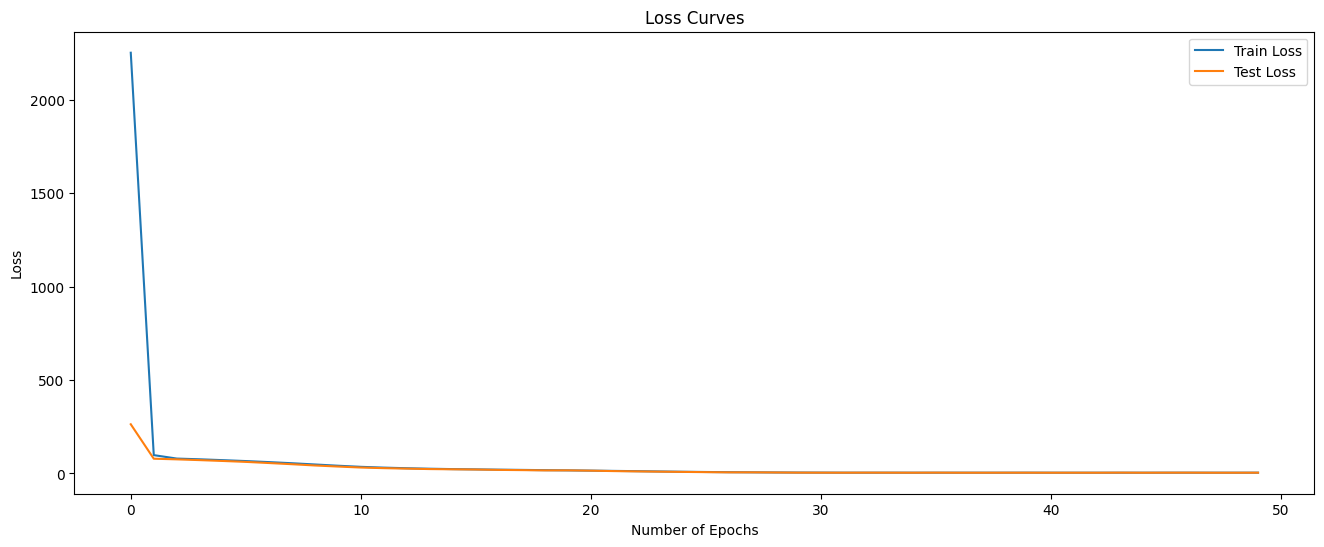

In [57]:
plt.figure(figsize=(16, 6))
plt.plot(range(len(train_losses)), train_losses, label='Train Loss')
plt.plot(range(len(test_losses)), test_losses, label='Test Loss')
plt.legend()
plt.title('Loss Curves')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()

In [58]:
# Print model weights
# Quick example to see your trained weights
print("Your trained model weights:")
print("=" * 40)

# Print first layer weights
print("First layer (input to hidden):")
print(f"Shape: {model.network[0].weight.shape}")
print(f"Sample weights: {model.network[0].weight.data[0, :5]}")

# Print last layer weights  
print("\nLast layer (hidden to output):")
print(f"Shape: {model.network[6].weight.shape}")
print(f"Weights: {model.network[6].weight.data}")
print(f"Bias: {model.network[6].bias.data}")

Your trained model weights:
First layer (input to hidden):
Shape: torch.Size([16, 5])
Sample weights: tensor([ 0.1994,  0.0750, -0.1583,  0.0169, -0.0683])

Last layer (hidden to output):
Shape: torch.Size([1, 64])
Weights: tensor([[ 1.2410e-01,  1.9390e-01, -1.0805e-02,  2.0264e-01, -5.4943e-03,
          1.7108e-01,  1.5715e-01, -1.1058e-01,  1.5464e-01, -2.4734e-02,
         -2.5149e-02, -4.4253e-02,  2.1688e-01, -7.4434e-02,  1.9518e-01,
         -3.7250e-02, -3.0547e-02,  2.3246e-01, -1.5961e-02, -5.2874e-02,
         -1.0451e-02,  7.2160e-04, -5.8363e-02,  8.0349e-02,  9.6900e-02,
         -1.2807e+00, -1.9132e-02, -2.8238e-02,  4.5677e-02,  2.0342e-01,
          6.5400e-02, -5.9936e-02, -2.8579e-02,  1.1223e-01,  9.6334e-02,
          1.9813e-01,  1.2991e-01,  1.2880e-01, -2.4132e-03, -3.1555e-02,
         -8.6303e-02, -1.3060e-02,  1.7372e-02,  1.0870e-01, -5.2317e-03,
          9.5961e-02, -9.1689e-02, -3.7916e-02, -1.6321e-02, -1.4840e-02,
         -8.3739e-02,  1.7756e-01,  

## 11. Making Predictions and Evaluating Performance

In this section, we use the trained model to make predictions on the test set and evaluate its performance.
We create a `DataLoader` called `predictions_dataloader` with the entire test dataset (`test_data`) in a single batch. This allows us to make predictions on all test samples at once. We set `batch_size=len(test_data)` to ensure that the entire test set is loaded in one batch.

In [47]:
predictions_dataloader = DataLoader(test_data, batch_size=len(test_data), shuffle=False)

In [48]:
# len(predictions_dataloader)

In [49]:
model.eval()
with torch.inference_mode():
    for X, y in predictions_dataloader:
        y_preds = model(X)
        print(f'Mean Squared Error = {mean_squared_error(y, y_preds)}')

Mean Squared Error = 4.264463901519775


## 12. Comparing Actual vs. Predicted Values

In this step, we will compare the actual values and predicted values for the test labels.

In [50]:
for _, y in predictions_dataloader:
    break

In [51]:
y_preds.squeeze().numpy(), y.numpy()

(array([76.80356 , 79.85096 , 90.748825, ..., 64.07443 , 27.818779,
        75.5746  ], shape=(1975,), dtype=float32),
 array([75., 76., 89., ..., 66., 28., 77.], shape=(1975,), dtype=float32))

In [52]:
results_df = pd.DataFrame({'Actual Performance Index': y.numpy(),
                           'Predicted Performance Index:': y_preds.squeeze().numpy()})

In [53]:
results_df

,Actual Performance Index,Predicted Performance Index:
0,75.0,76.803558
1,76.0,79.850960
2,89.0,90.748825
3,69.0,67.656990
4,44.0,45.775402
...,...,...
1970,66.0,65.282639
1971,95.0,96.155411
1972,66.0,64.074432
1973,28.0,27.818779


## 13. Saving Model Parameters

Next, we save the trained model's parameters to a file for future use. Saving the model parameters allows us to persist the model's learned weights and biases, so we can later load and use the model without needing to retrain it.

In [54]:
params_1 = model.state_dict()

In [ ]:
# Specify the file path to save the model parameters
model_save_path = 'neural_network_parameters.pth'

# Save the model parameters
torch.save(model.state_dict(), model_save_path)

## 14. Loading the Model

In this section, we load the parameters of the pre-trained model from a saved file. This allows us to restore the model's state and use it for evaluation or further predictions without needing to retrain it.

In [ ]:
model = NeuralNetwork(input_dim=X_train.shape[1], hidden_dim=8)

model_load_path = '/kaggle/working/neural_network_parameters.pth'
model.load_state_dict(torch.load(model_load_path))